In [1]:
def SDCTD_stevilo(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum([x[v] for v in g]))

    for v in g.vertices():
        neighbors = g.neighbors(v)  
        p.add_constraint(x[v] + sum(x[w] for w in neighbors) >= 1)

    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)  
        if neighbors_complement:  
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)

        else: 
            zaustavi = True
            break 

    if not zaustavi == True:
        p.solve()
        x = p.get_values(x)
        return(sum(1 for i in x.values() if i == 1))
    else:
        return None

In [2]:
def max_st(n):
    i = n
    vsi_grafi = [G for G in graphs.nauty_geng(f"{i} -c")] #obravnavamo samo povezane
    
    seznam = [] #seznam s SDCTD števili
    ustrezni_grafi = []  # seznam z grafi

    for g in vsi_grafi:
        stevilo = SDCTD_stevilo(g)
        
        if stevilo is not None: #dodajamo dominacijska stevila
            seznam.append(stevilo)
            ustrezni_grafi.append(g)
    
    if not ustrezni_grafi:   #ce ni ok grafov vrni None
        print("Ne obstajajo grafi s SDCTD številom")
        return None  
    #max SDCTD stevilo
    max_vrednost = max(seznam)
    #Vsi taki grafi
    max_grafi = [ustrezni_grafi[i] for i in range(len(ustrezni_grafi)) if seznam[i] == max_vrednost] #izberemo max vrednost
    
    print(f"Grafi z max SDCTD številom ({max_vrednost}):") prikaz grafov
    for g in max_grafi:
        g.show()

In [3]:
def min_st(n):
    i = n
    vsi_grafi = [G for G in graphs.nauty_geng(f"{i} -c")] #vsi grafi na n vozliščih
    
    seznam = [] #za SDCTD števila
    ustrezni_grafi = []  # za grafe
    
    for g in vsi_grafi:
        stevilo = SDCTD_stevilo2(g)
        
        if stevilo is not None:
            seznam.append(stevilo)
            ustrezni_grafi.append(g)
    
    if not ustrezni_grafi:
        print("Ne obstajajo grafi s SDCTD številom")
        return None  
    
    # min SDCTD število
    min_vrednost = min(seznam)
    
    # Vsi taki grafi
    min_grafi = [ustrezni_grafi[i] for i in range(len(ustrezni_grafi)) if seznam[i] == min_vrednost]
    
    print(f"Grafi z min SDCTD številom ({min_vrednost}):")
    for g in min_grafi:
        g.show()

Grafi z max SDCTD številom (4):


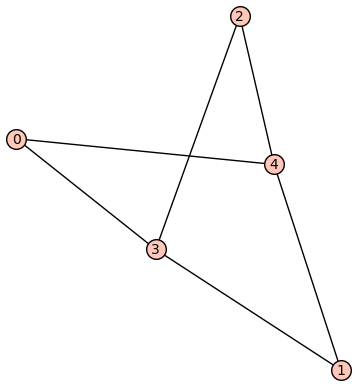

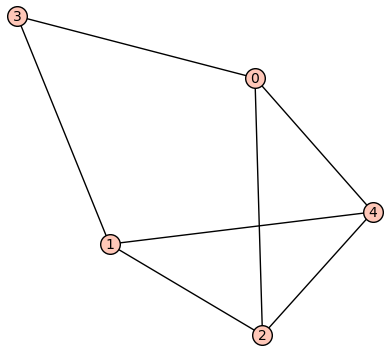

In [8]:
max_st(5)

Grafi z max SDCTD številom (6):


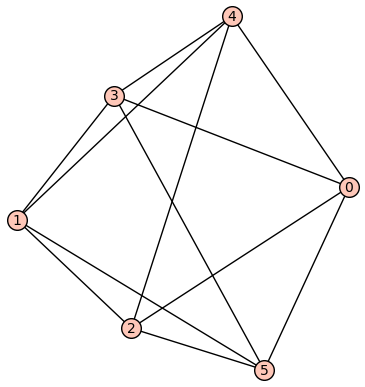

In [9]:
max_st(6)

Grafi z max SDCTD številom (6):


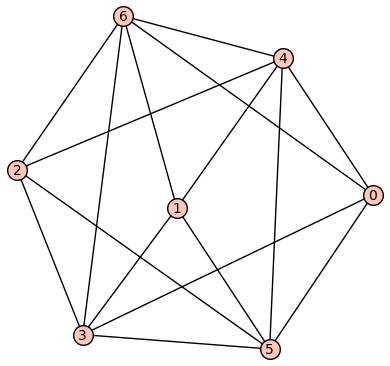

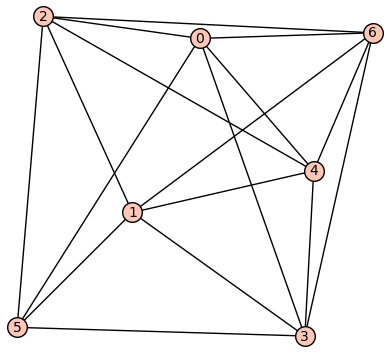

In [10]:
max_st(7)

In [0]:
max_st(8)

Grafi z min SDCTD številom (2):


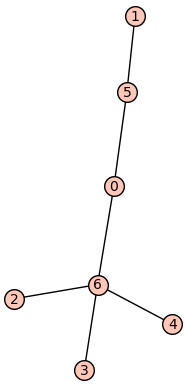

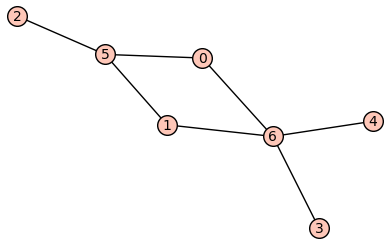

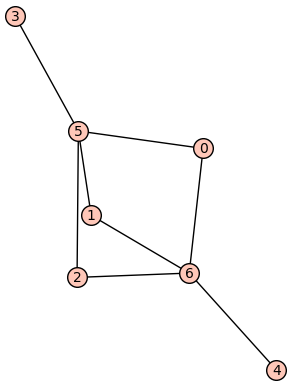

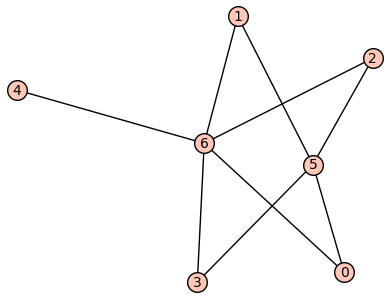

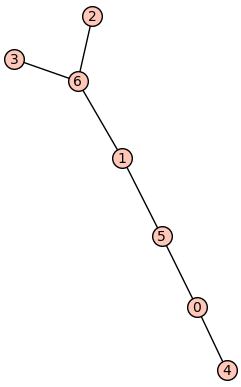

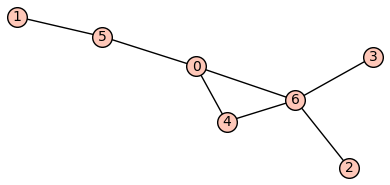

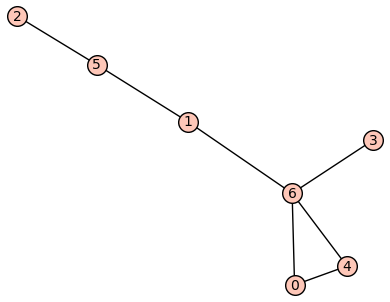

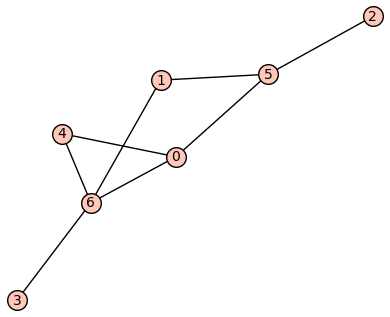

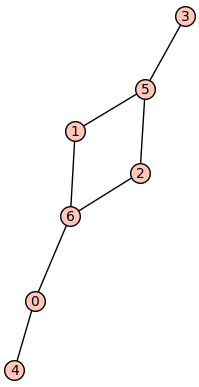

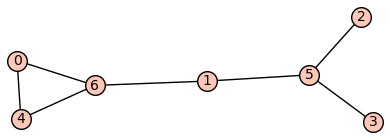

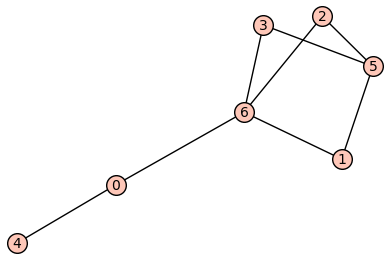

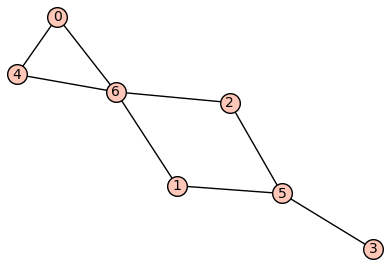

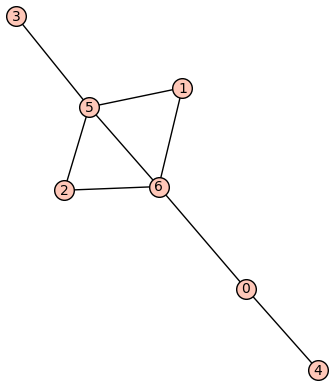

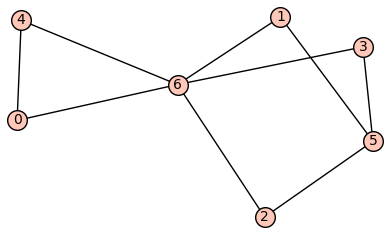

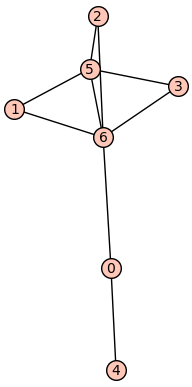

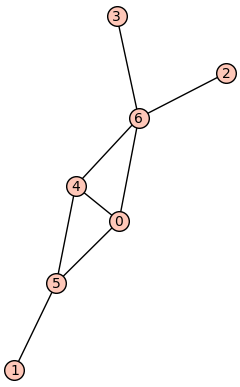

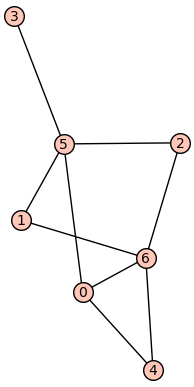

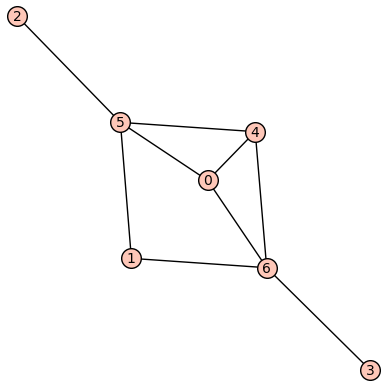

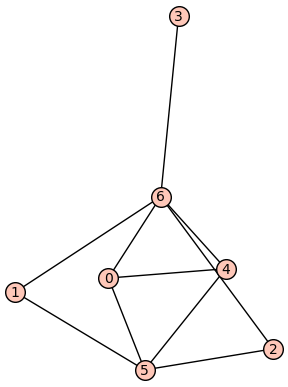

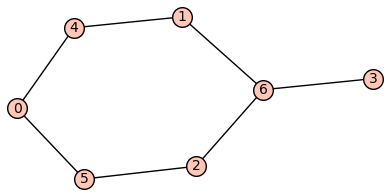

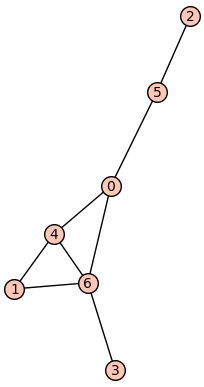

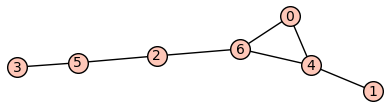

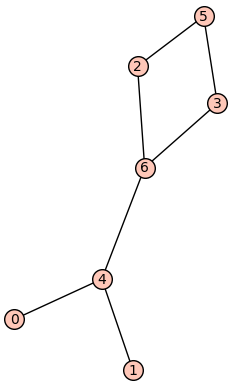

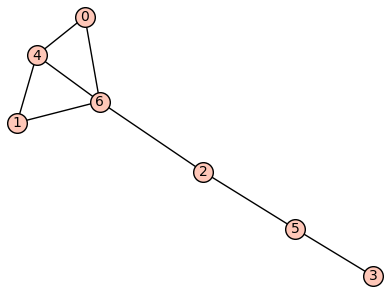

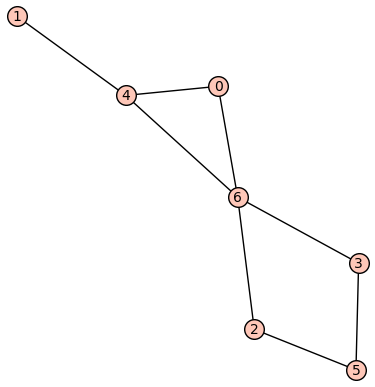

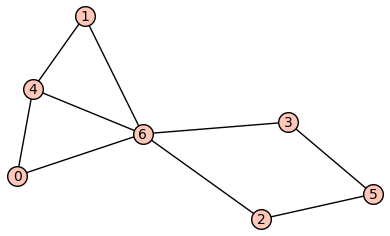

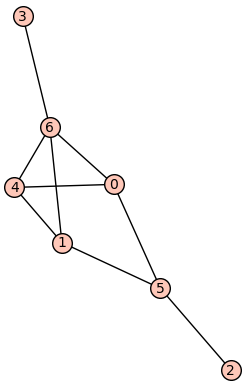

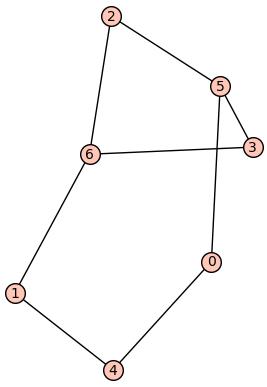

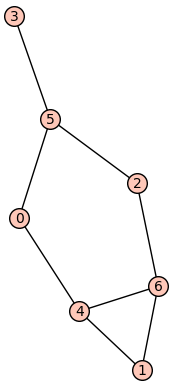

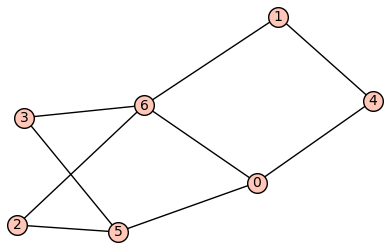

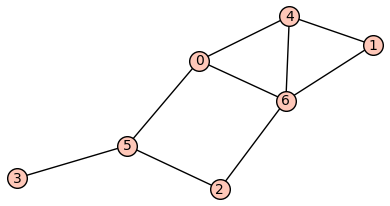

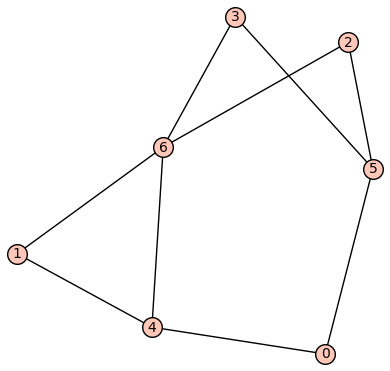

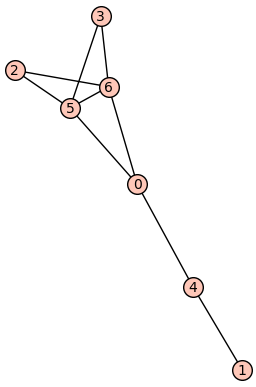

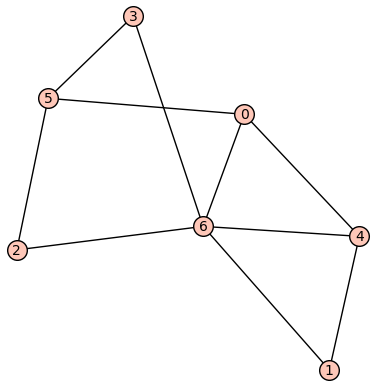

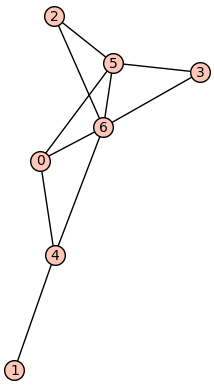

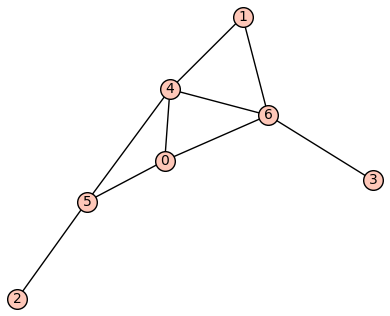

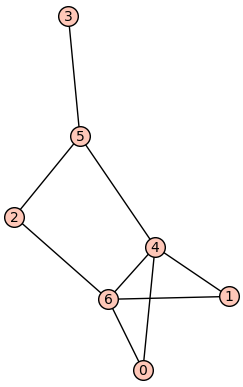

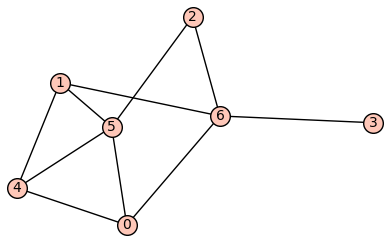

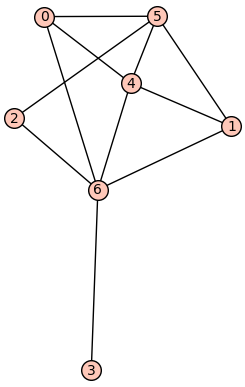

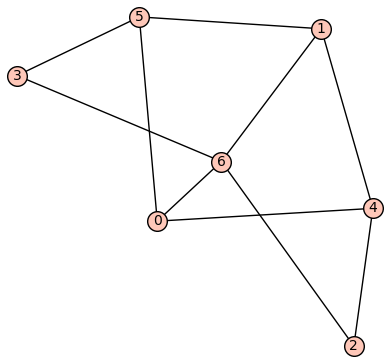

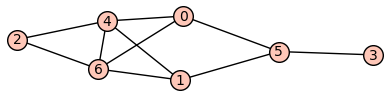

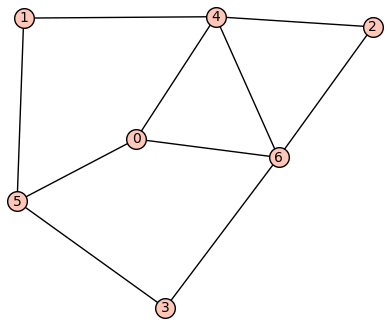

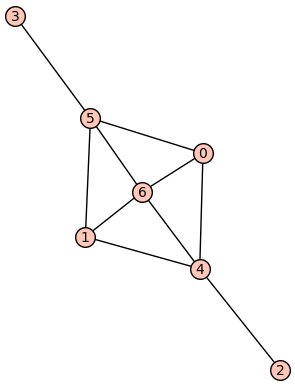

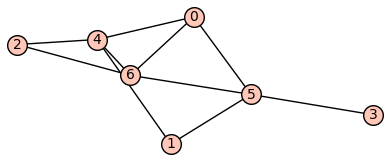

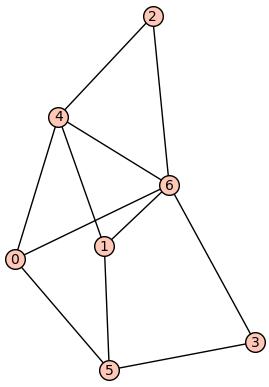

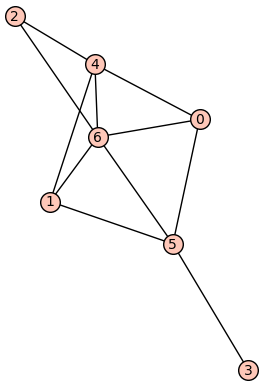

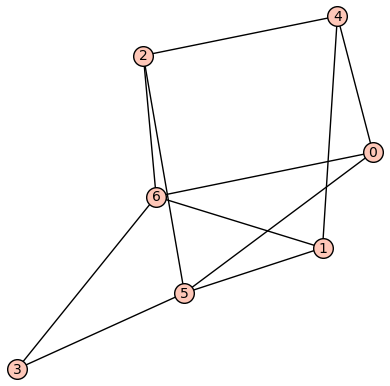

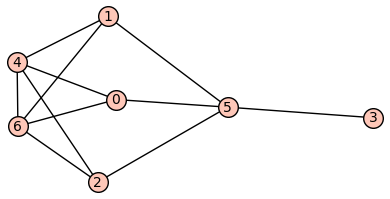

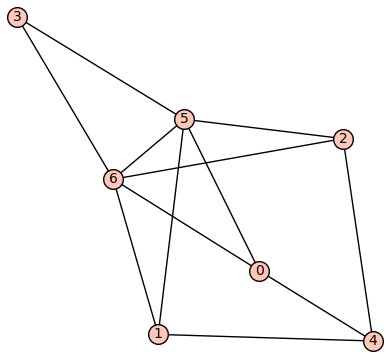

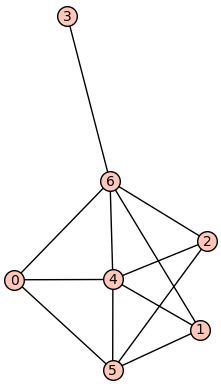

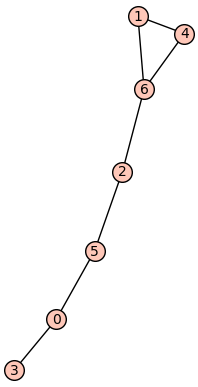

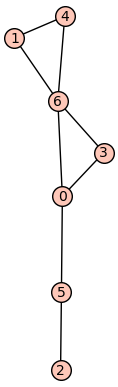

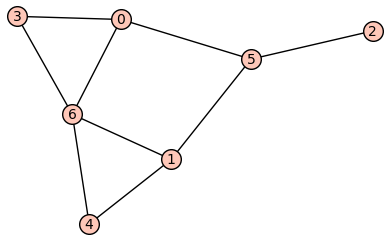

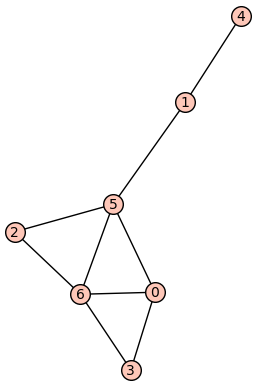

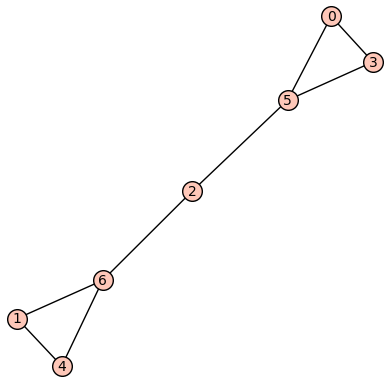

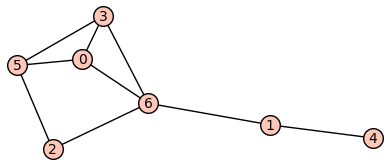

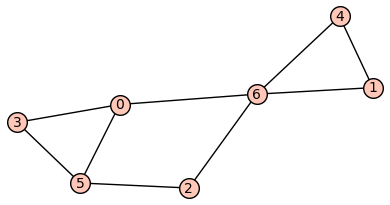

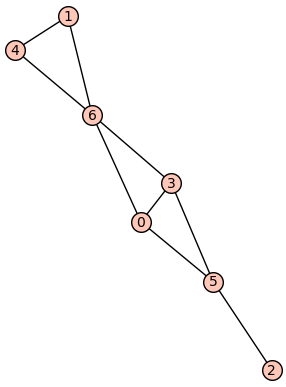

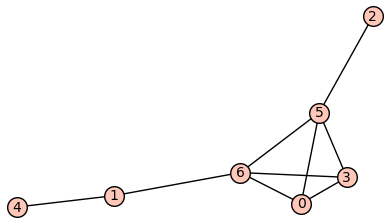

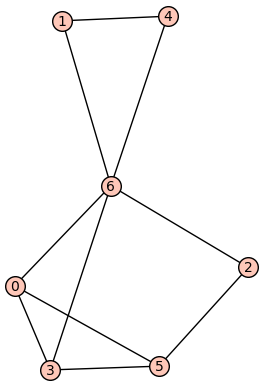

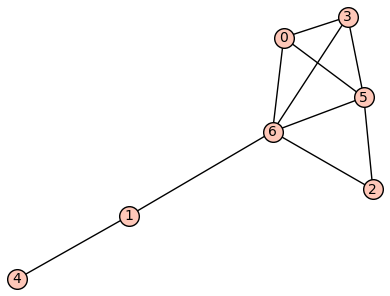

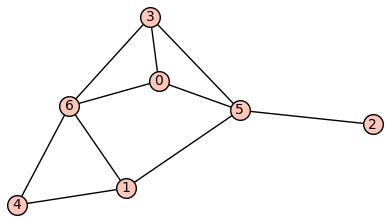

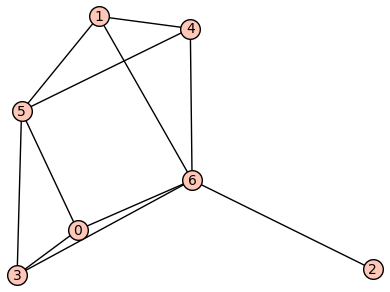

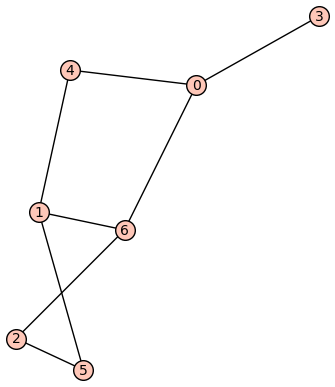

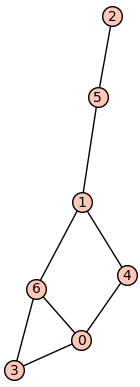

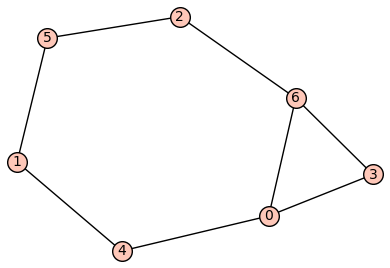

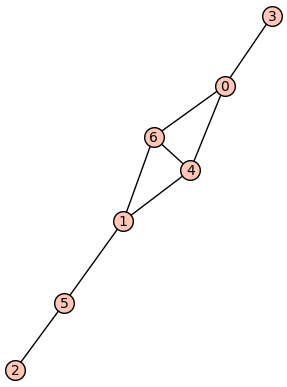

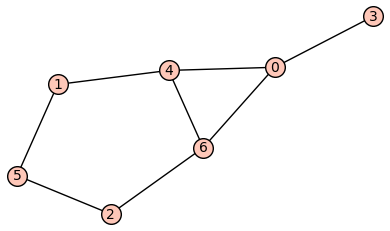

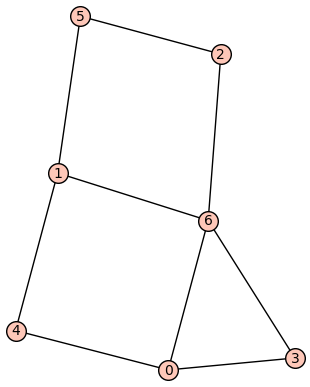

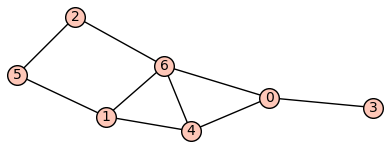

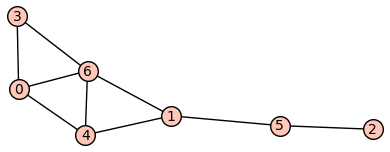

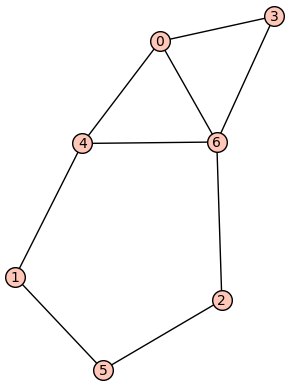

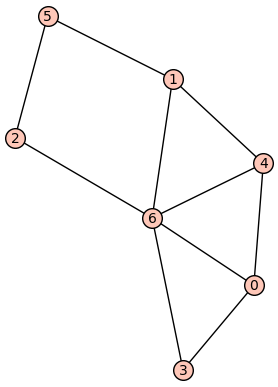

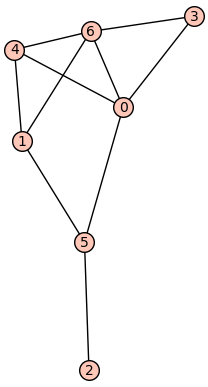

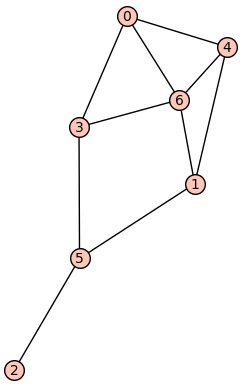

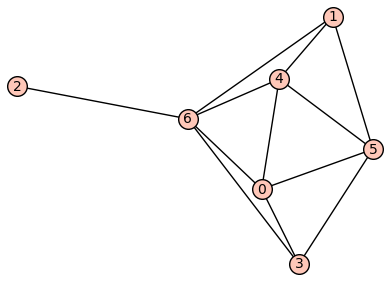

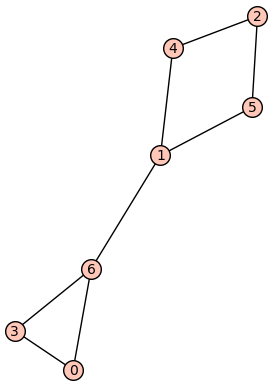

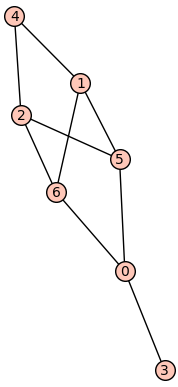

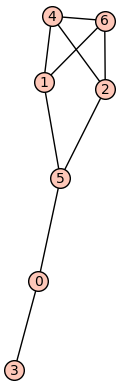

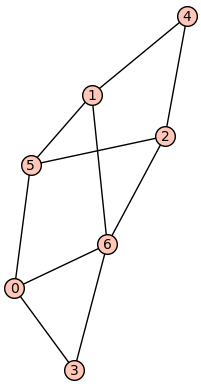

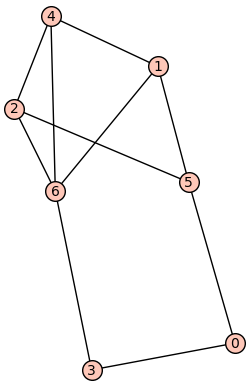

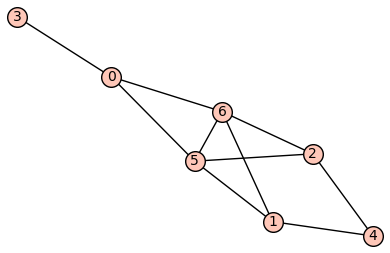

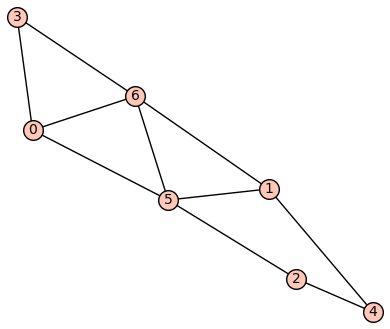

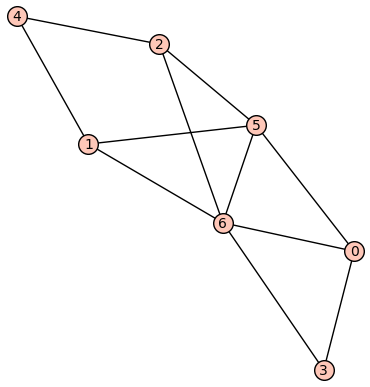

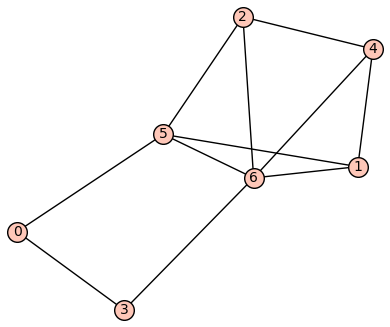

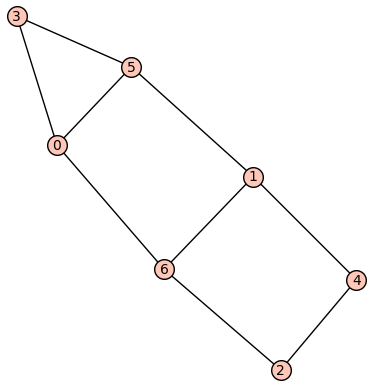

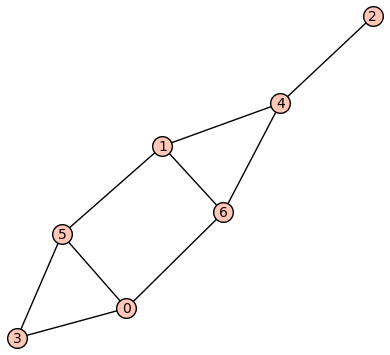

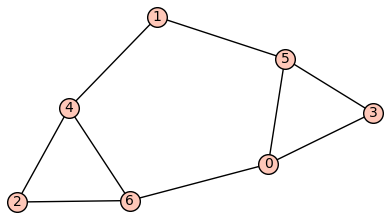

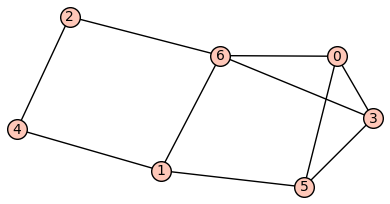

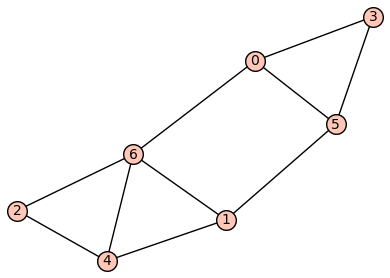

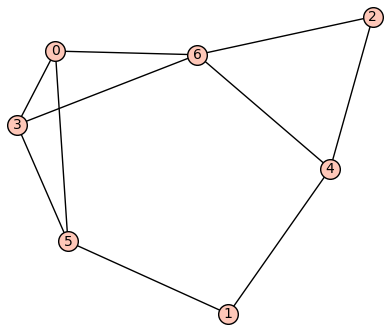

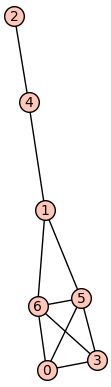

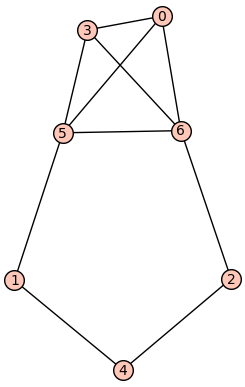

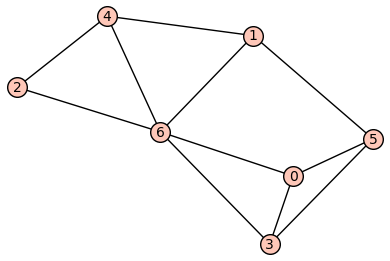

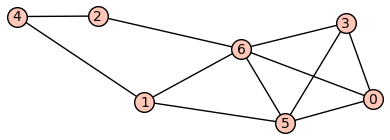

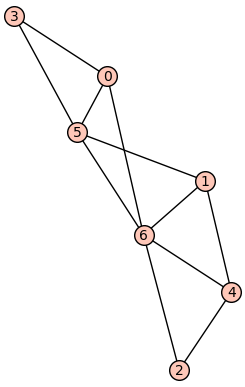

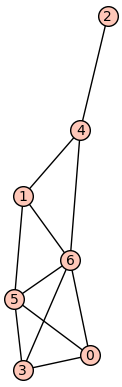

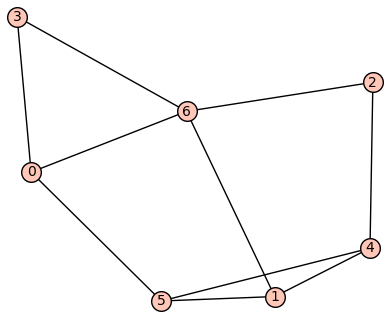

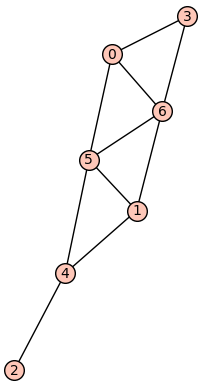

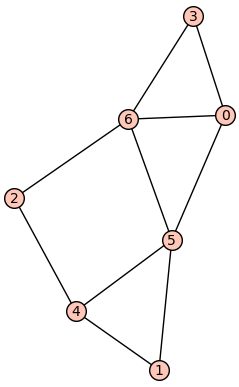

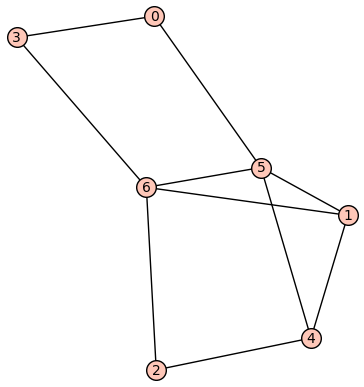

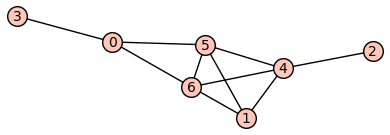

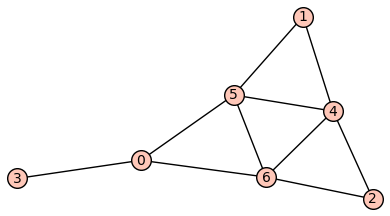

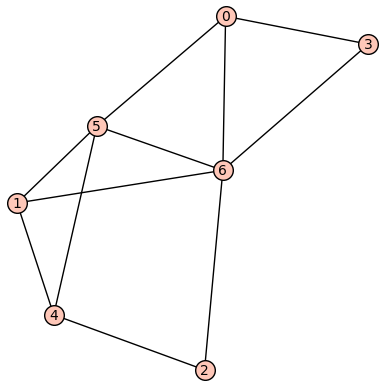

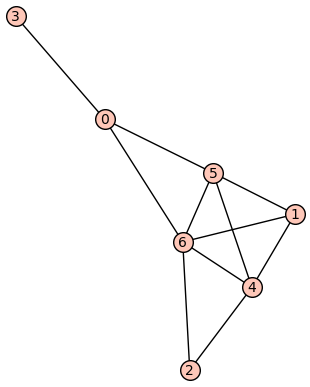

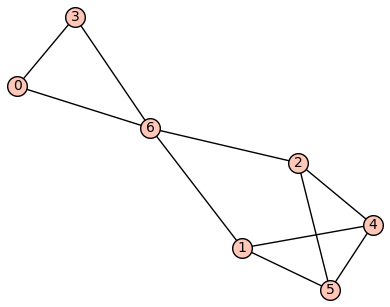

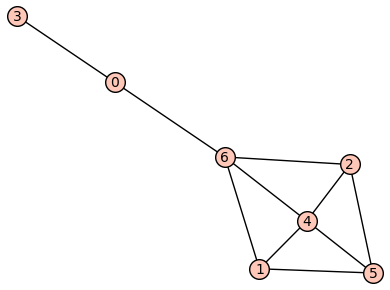

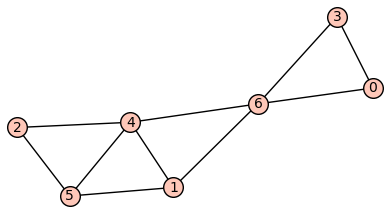

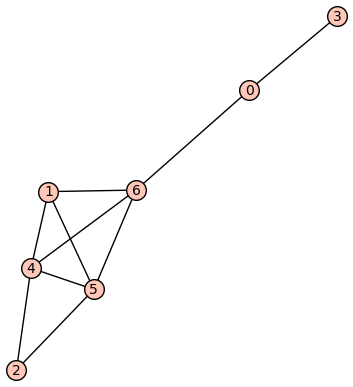

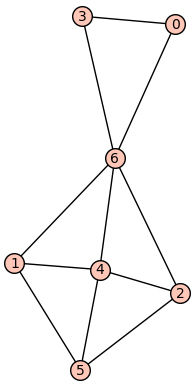

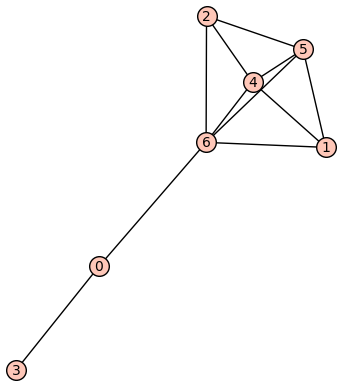

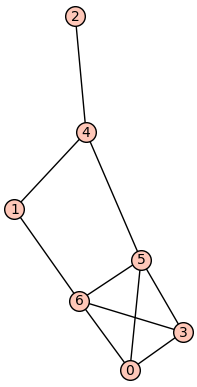

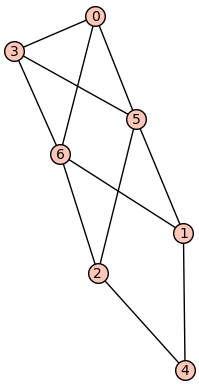

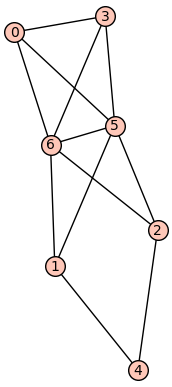

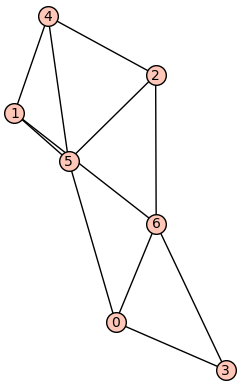

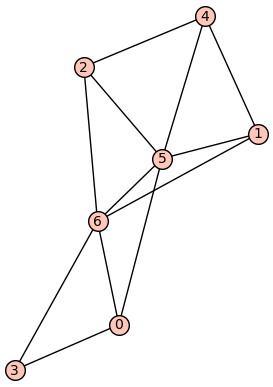

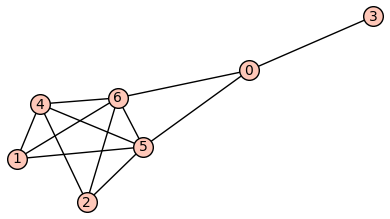

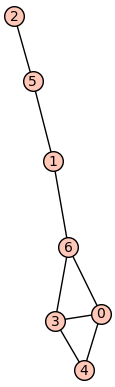

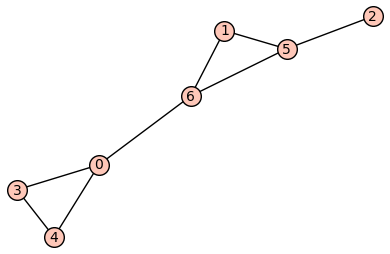

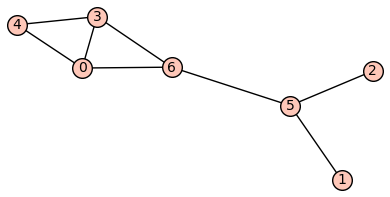

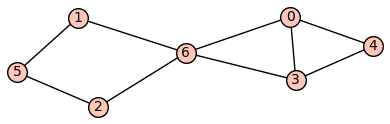

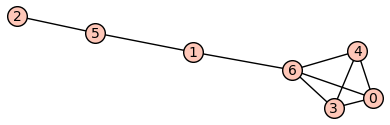

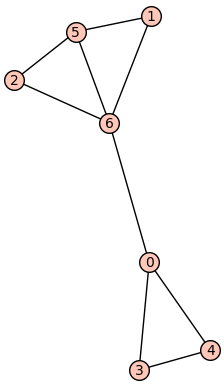

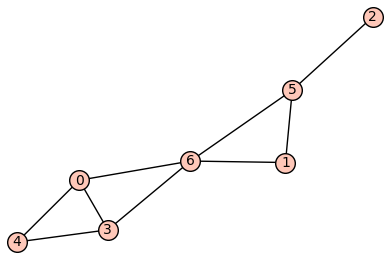

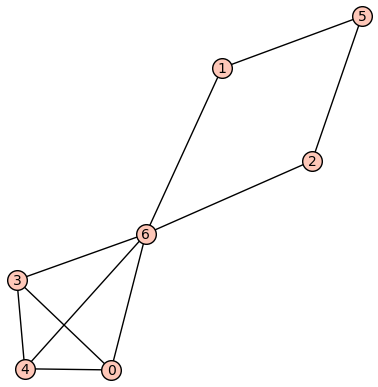

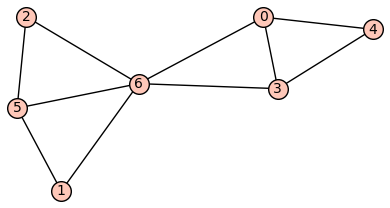

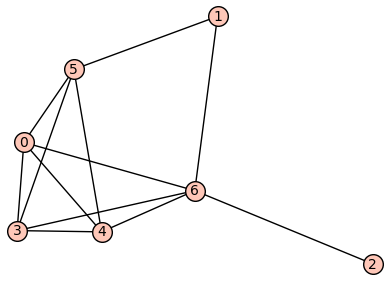

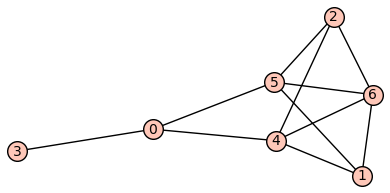

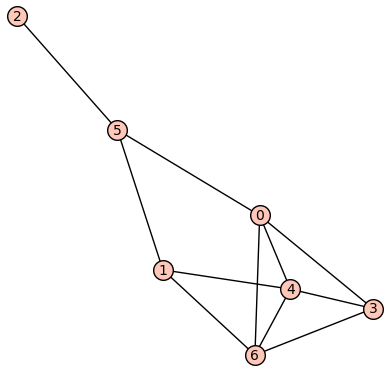

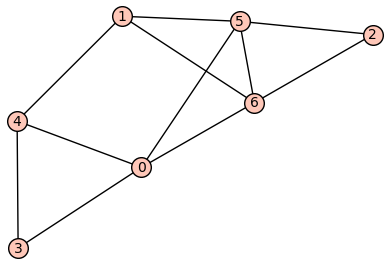

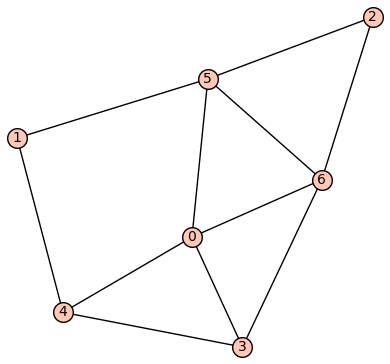

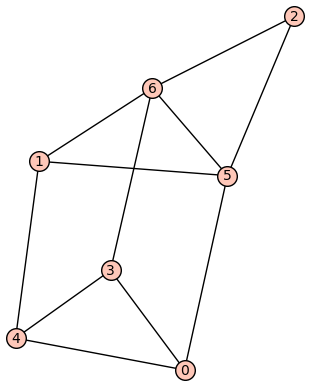

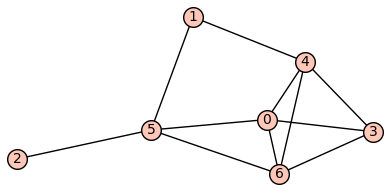

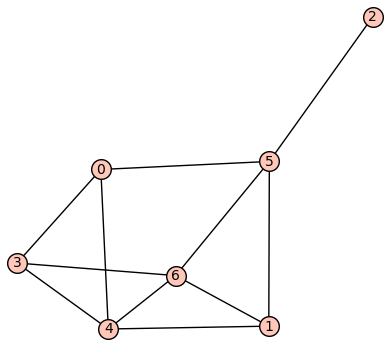

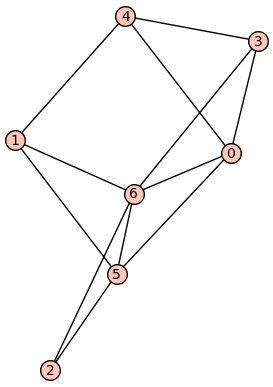

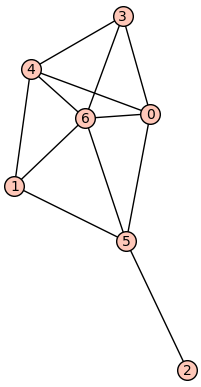

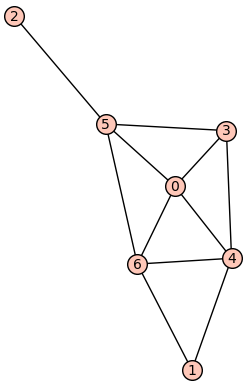

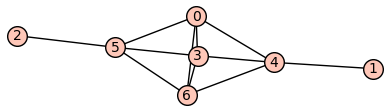

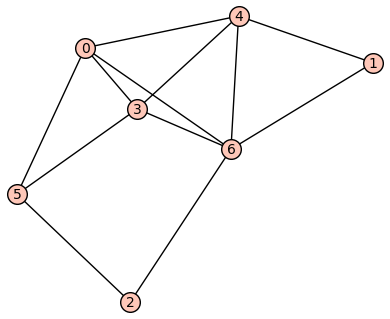

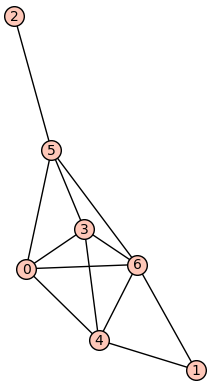

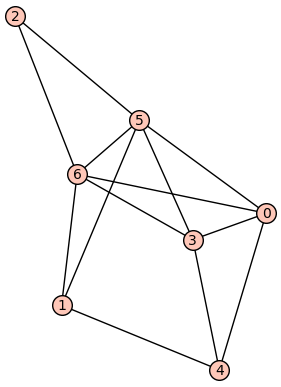

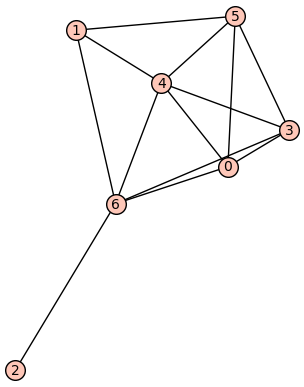

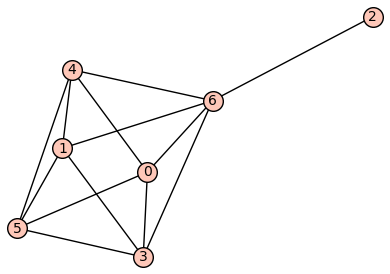

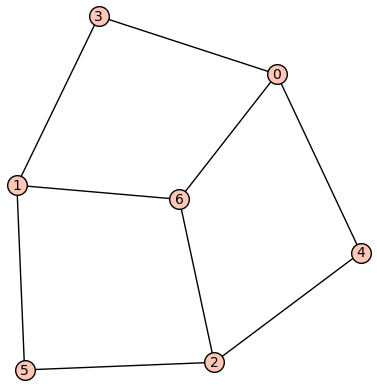

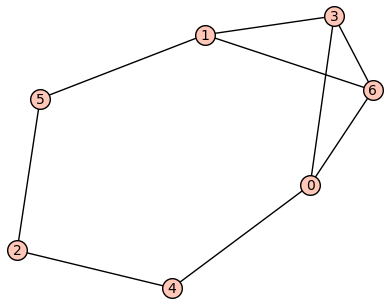

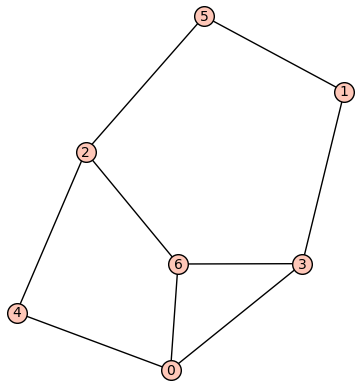

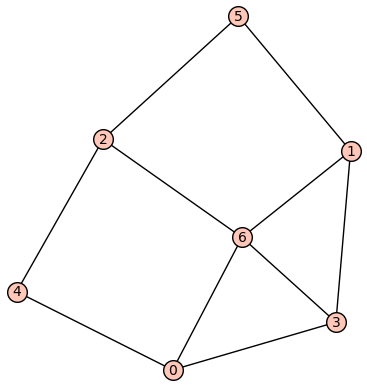

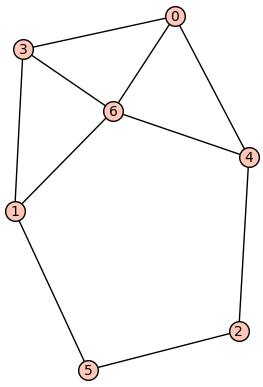

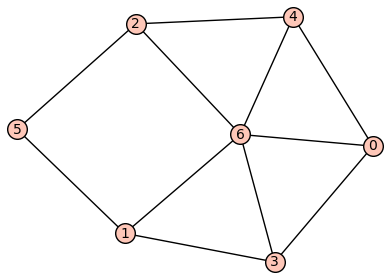

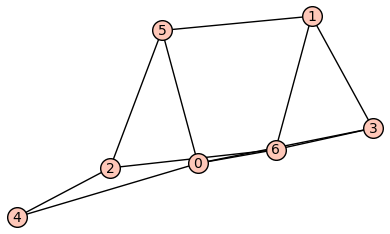

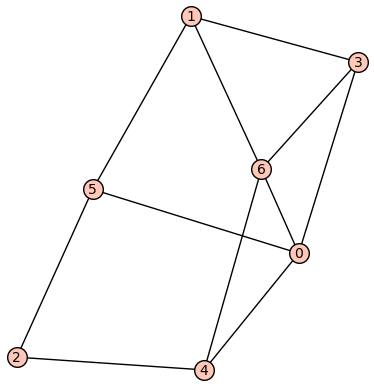

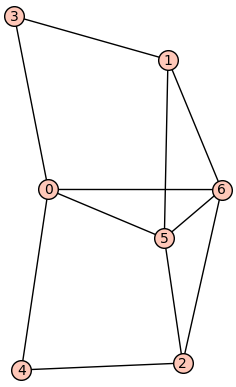

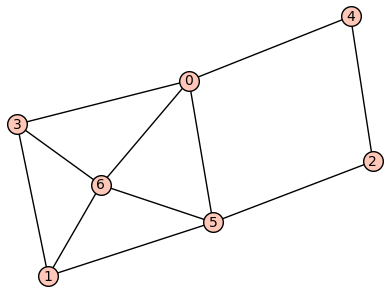

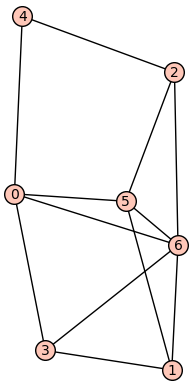

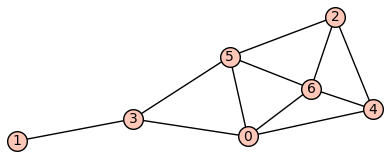

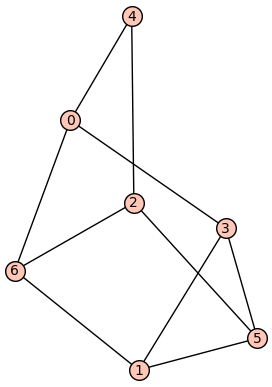

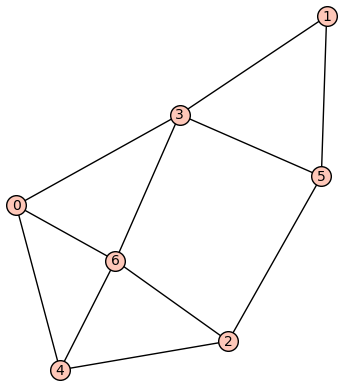

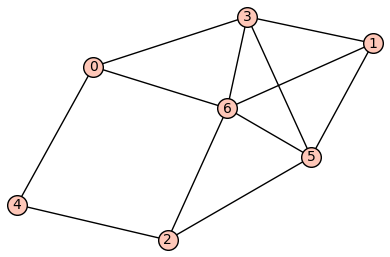

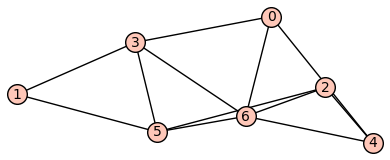

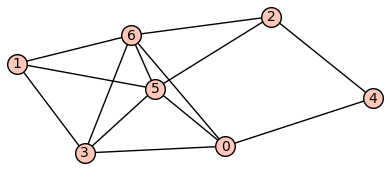

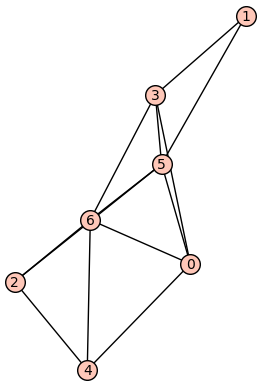

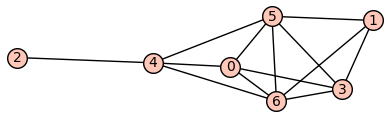

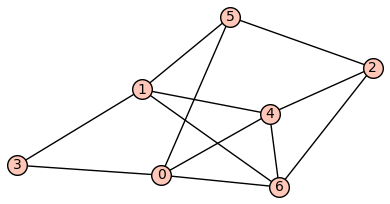

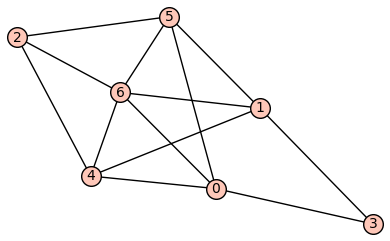

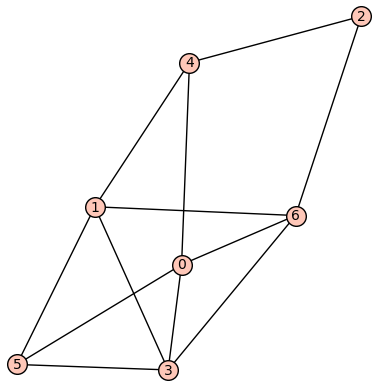

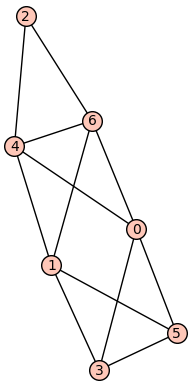

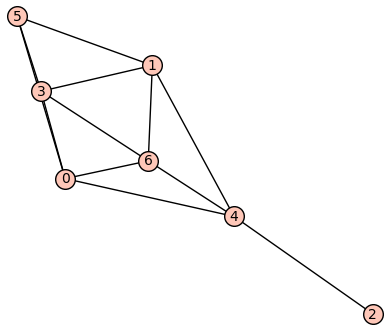

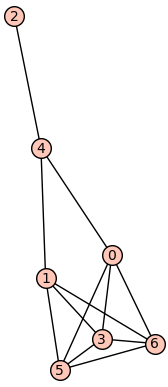

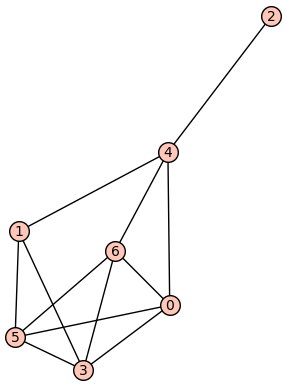

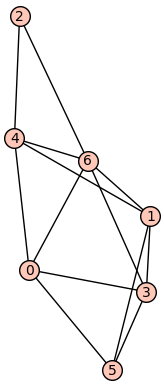

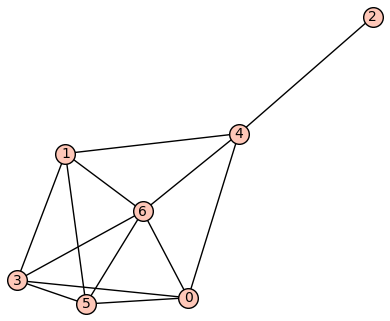

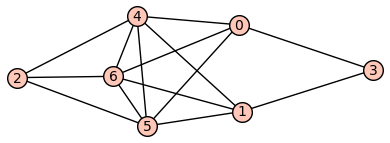

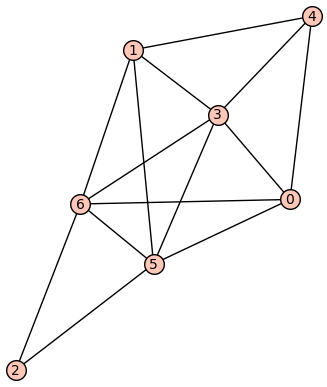

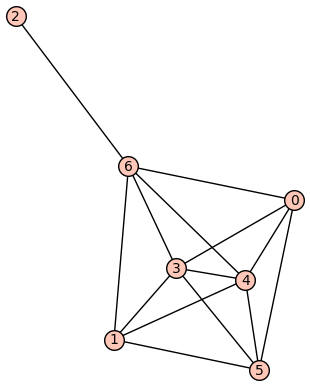

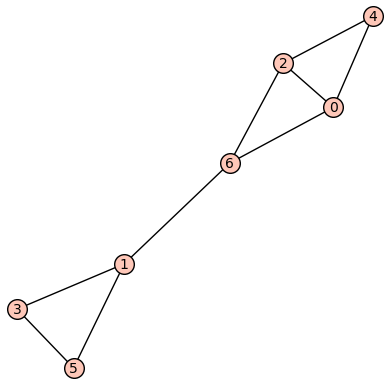

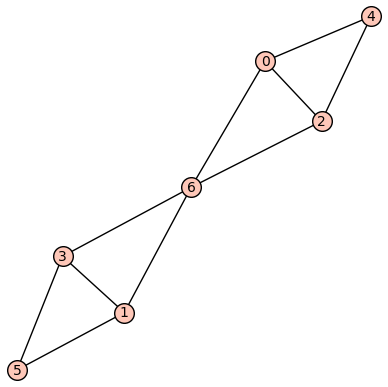

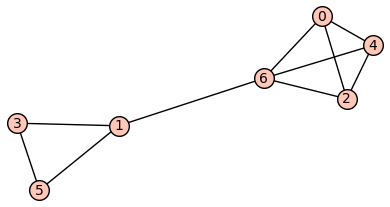

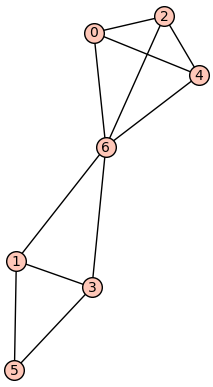

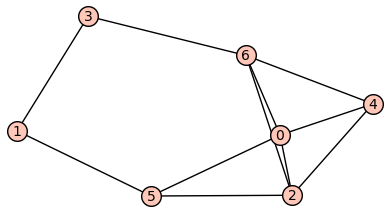

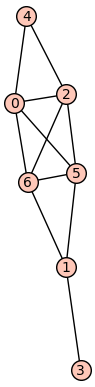

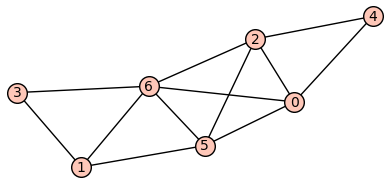

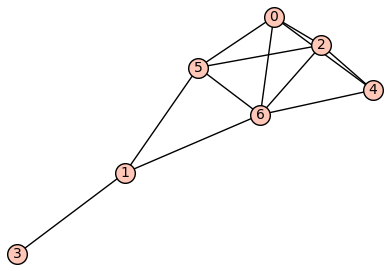

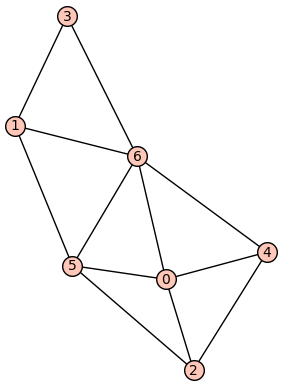

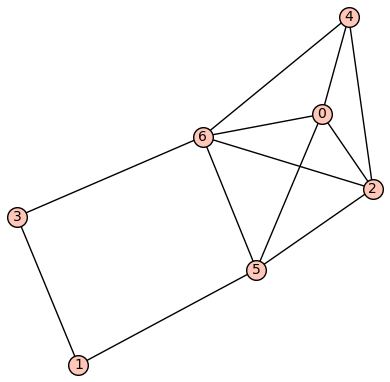

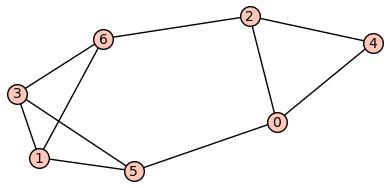

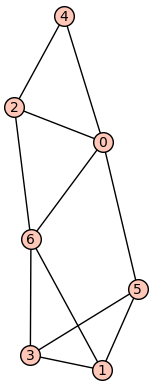

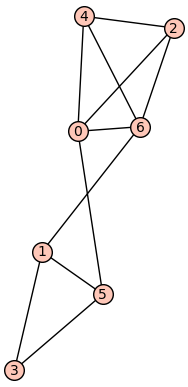

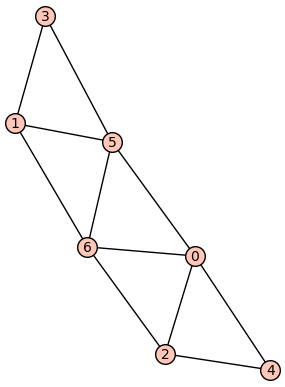

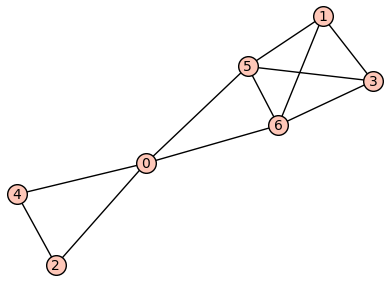

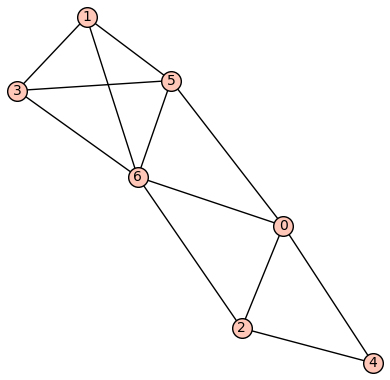

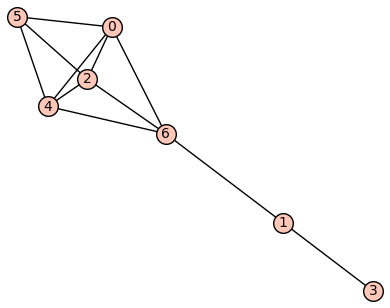

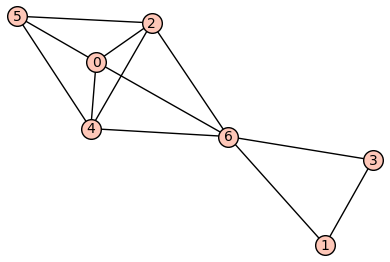

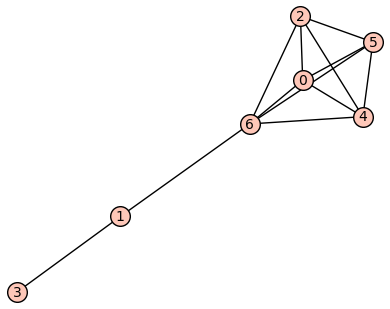

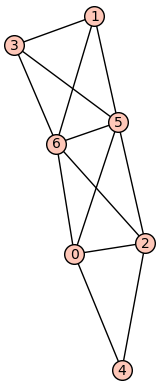

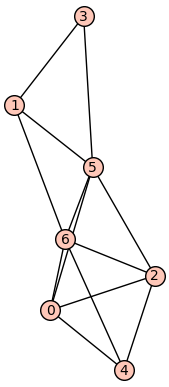

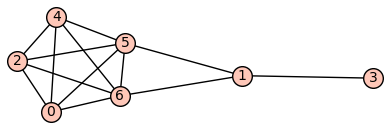

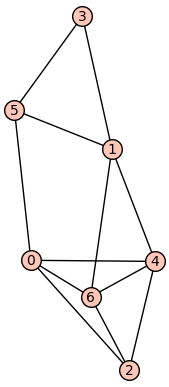

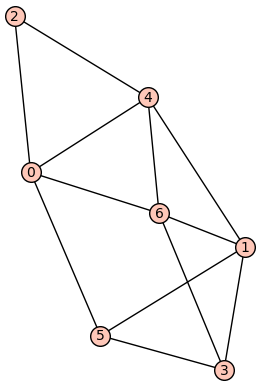

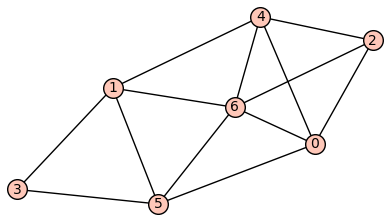

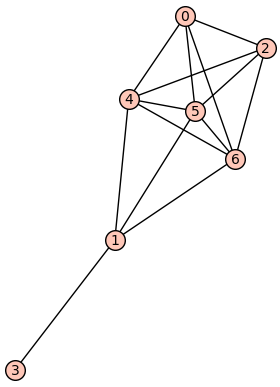

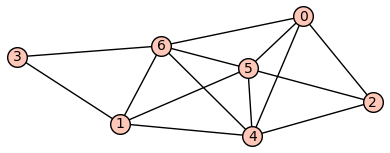

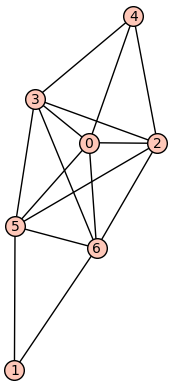

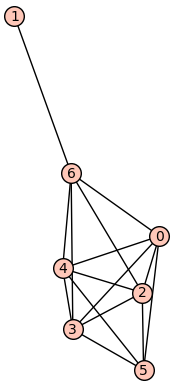

In [5]:
min_st(7)